# Shritesh_Jagtap_Google_Play_Store_Sentiment_Analysis

In [1]:
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # 
import scipy.sparse
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import plot_confusion_matrix                   # plot of confusion matrix
from sklearn.metrics import mean_squared_error           

In [2]:
g_store= pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/user_reviews.csv")
g_store

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [3]:
g_store.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [4]:
g_store=g_store.dropna()

In [5]:
g_store.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [6]:
g_store['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [7]:
g_store['Translated_Review'].value_counts()

Good                                                                                                                                                                                                                                                                                                                 247
Nice                                                                                                                                                                                                                                                                                                                 173
Great                                                                                                                                                                                                                                                                                                                131
Love                                                         

## DATA CLEANING

In [8]:
data=g_store.copy()

In [9]:
import re
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) 
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    
    text = text.lower()
    return text

In [10]:
data["Translated_Review"] = data["Translated_Review"].apply(cleaning)

In [11]:
data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,i like eat delicious food that s i m cooking f...,Positive,1.000000,0.533333
1,10 Best Foods for You,this help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,most ads older many agents not much owner post...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,if photos posted portal load fit purpose i m s...,Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,dumb app i wanted post property rent give opti...,Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,i property business got link sms happy perform...,Positive,0.800000,1.000000


In [12]:
a=g_store[g_store['App']=='591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢']
a

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1020,591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價...,This good searching house.,Positive,0.700000,0.600000
1021,591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價...,This app is basically a landlord/seller orient...,Negative,-0.093620,0.679167
1023,591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價...,I have given examples. What else is unclear? A...,Positive,0.078125,0.406250
1024,591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價...,Map mode can see the number of objects and the...,Negative,-0.300000,0.400000
1030,591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價...,"It is also the telephone information, but also...",Neutral,0.000000,1.000000
1034,591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價...,Rotten.... Pushing the broadcast has been push...,Neutral,0.000000,0.000000
1037,591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價...,Need phone permission? No way.,Neutral,0.000000,0.000000
1038,591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價...,No english Such shame,Neutral,0.000000,0.250000
1039,591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價...,Personal collection can't synchronize with the...,Neutral,0.000000,0.212500
1041,591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價...,Essential This essential foreigners living Tai...,Positive,0.035714,0.478005


### There are many names of apps in other language,so i have to change that in English Language by using google translator.

## VADER SENTIMENT ANALYSIS

In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from googletrans import Translator
translator = Translator()

In [16]:
data.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [17]:
# Creating a loop to check if the language is english or not, if not translating it into english

for i in range(len(data.iloc[:, 0])):
    
    dt = translator.detect(data.iloc[i, 0])
    if  dt != 'en':
        data.iloc[i, 0] = translator.translate(data.iloc[i, 0],dest='en').text

In [18]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
res2 = {}
t = 0
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['Translated_Review']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/37427 [00:00<?, ?it/s]

In [24]:
index = pd.Index(range(len(g_store)))

In [25]:
data = data.set_index(index)

In [26]:
j = pd.DataFrame(res2).T
j

,neg,neu,pos,compound
0,0.000,0.430,0.570,0.9531
1,0.000,0.481,0.519,0.6597
2,0.000,0.549,0.451,0.6249
3,0.000,0.323,0.677,0.6369
4,0.000,0.192,0.808,0.6369
...,...,...,...,...
37422,0.238,0.762,0.000,-0.6486
37423,0.044,0.717,0.240,0.7430
37424,0.337,0.663,0.000,-0.7269
37425,0.000,0.638,0.362,0.7783


In [27]:
Main_data = pd.concat([data, j], axis = 1)

In [28]:
Main_data.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
neg                       0
neu                       0
pos                       0
compound                  0
dtype: int64

In [29]:
Main_data.insert(2, 'Class_reviews', np.nan)
Main_data.loc[Main_data['compound']>=0.05, 'Class_reviews'] = 'pos'
Main_data.loc[Main_data['compound']<=-0.05, 'Class_reviews'] = 'neg'
Main_data.loc[((Main_data['compound'] > -0.05) & (Main_data['compound'] < 0.05)), 'Class_reviews'] = 'neutral'

In [30]:
Main_data.head()

,App,Translated_Review,Class_reviews,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,neg,neu,pos,compound
0,10 Best Foods for You,i like eat delicious food that s i m cooking f...,pos,Positive,1.00,0.533333,0.0,0.430,0.570,0.9531
1,10 Best Foods for You,this help eating healthy exercise regular basis,pos,Positive,0.25,0.288462,0.0,0.481,0.519,0.6597
2,10 Best Foods for You,works great especially going grocery store,pos,Positive,0.40,0.875000,0.0,0.549,0.451,0.6249
3,10 Best Foods for You,best idea us,pos,Positive,1.00,0.300000,0.0,0.323,0.677,0.6369
4,10 Best Foods for You,best way,pos,Positive,1.00,0.300000,0.0,0.192,0.808,0.6369


In [31]:
Main_data['Class_reviews'].value_counts()

pos        25729
neg         7424
neutral     4274
Name: Class_reviews, dtype: int64

## Word Cloud

In [33]:
from wordcloud import WordCloud, STOPWORDS 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
# applying stopword function on review
Main_data['Translated_Review'] = Main_data['Translated_Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [35]:
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 50,
    stopwords = stopwords,
    scale = 3).generate(str(Main_data["Translated_Review"]))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [36]:
neg=Main_data[Main_data["Class_reviews"] == "neg"]["Translated_Review"]
pos=Main_data[Main_data["Class_reviews"] == "pos"]["Translated_Review"]
neu=Main_data[Main_data["Class_reviews"] == "neutral"]["Translated_Review"]

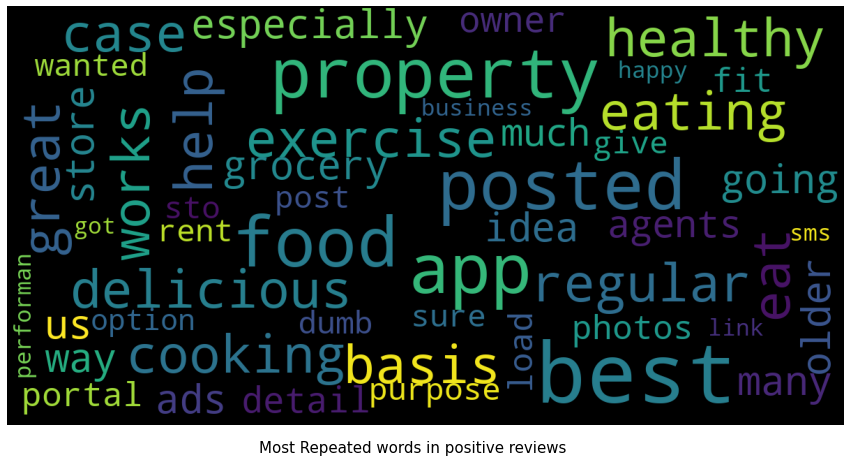

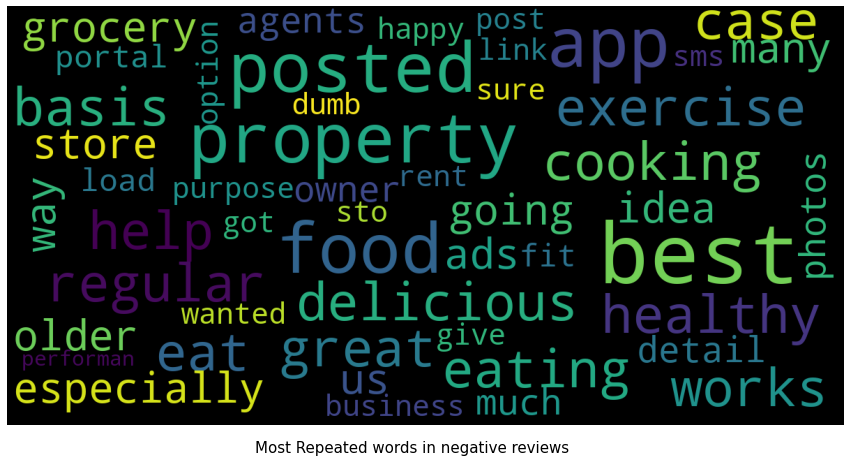

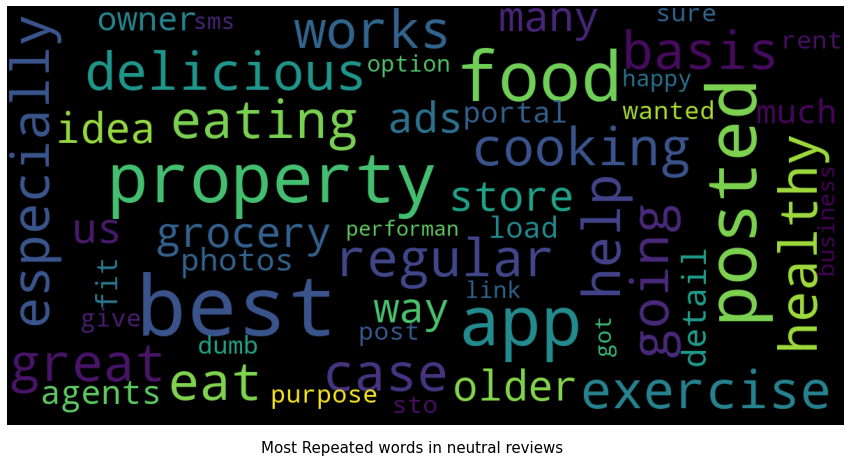

In [37]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

In [38]:
# Getting BIGRAM
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3),stop_words='english').fit(corpus)   # converting a text documents to a matrix of token counts.      
    bag_of_words = vec.transform(corpus)                                         # Transforming the corpus into numbers
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]     # it provides a dictionary with the mapping of the word item index 
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

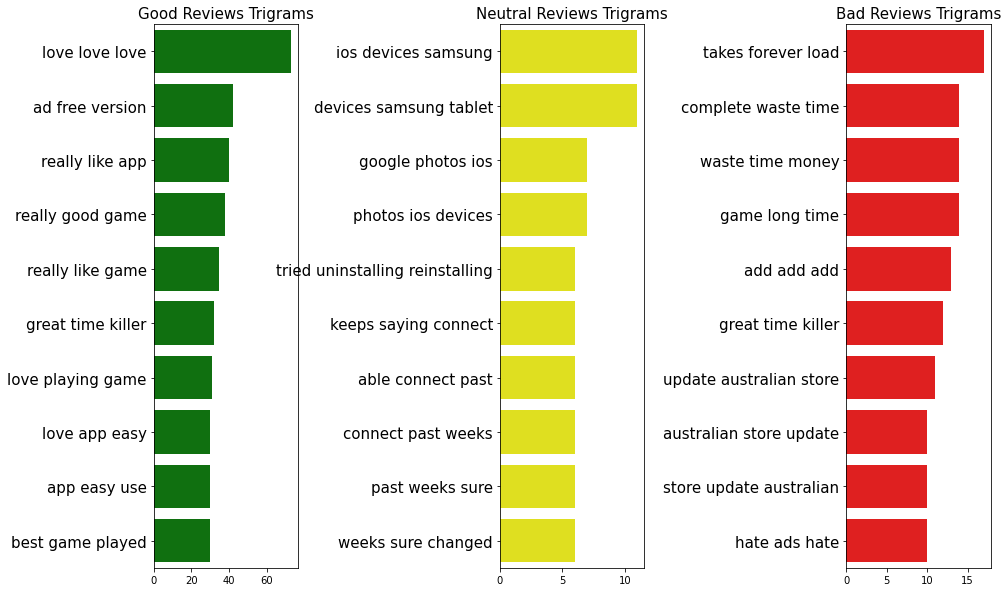

In [39]:
def n_gram_plot(Main_data,title,color):                            # Creating n_gram_plot function
    x=[x[0] for x in Main_data]
    y=[x[1] for x in Main_data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Trigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 10)                  # Calling get_top_n_bigram for pos columns
common_words_neutral = get_top_n_bigram(neu, 10)               # Calling get_top_n_bigram for neu columns
common_words_bad = get_top_n_bigram(neg, 10)                   # Calling get_top_n_bigram for neg columns

# bigram plot using function above
plt.figure(figsize=(15,10))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')                  # Calling n_gram_plot for pos 
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')           # Calling n_gram_plot for pos
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')                      # Calling n_gram_plot for pos
plt.show() 

### From the above plots we can see that most occuring Trigram words in the text reveiws
Based on the negative sentiment words the reasons for negative reviews are\ 

takes forever load \
complete waste time \
waste time money

## MACHINE LEARNING

In [40]:
X = Main_data['Translated_Review']
Y = Main_data['Class_reviews']

In [41]:
Y = LabelEncoder().fit_transform(Y)
Y

array([2, 2, 2, ..., 0, 2, 0])

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [43]:
%%time
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.1, min_df = 1,
                             use_idf = True, smooth_idf = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

CPU times: user 486 ms, sys: 0 ns, total: 486 ms
Wall time: 492 ms


In [44]:
# Making and Fitting the Model

model = LogisticRegression(multi_class = 'ovr').fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [45]:
%%time
print(classification_report(Y_test, y_pred, target_names = ['neg', 'neu', 'pos']))

              precision    recall  f1-score   support

         neg       0.85      0.59      0.69      1533
         neu       0.81      0.21      0.33       862
         pos       0.80      0.97      0.87      5091

    accuracy                           0.80      7486
   macro avg       0.82      0.59      0.63      7486
weighted avg       0.81      0.80      0.77      7486

CPU times: user 24.9 ms, sys: 33.4 ms, total: 58.3 ms
Wall time: 36 ms


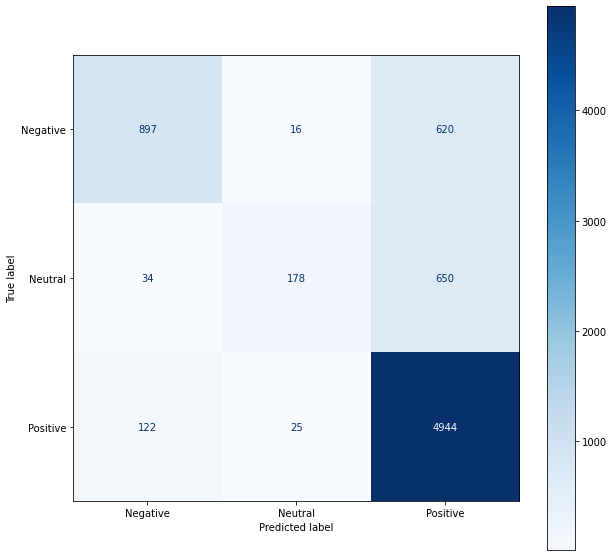

In [46]:
color = 'white'
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, display_labels = ['Negative','Neutral','Positive'], ax = ax)
plt.show()

### There are High Positive Reviews

## Clustering

In [47]:
x=Main_data.iloc[:,[4,5]].values

In [48]:
from sklearn.cluster import KMeans
errors=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    errors.append(kmeans.inertia_)

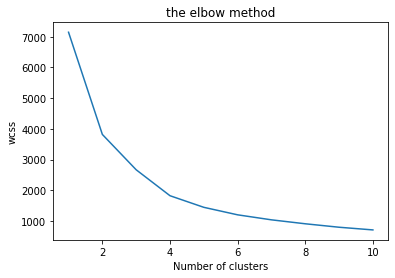

In [49]:
plt.plot(range(1,11) ,errors)
plt.title("the elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [50]:
kmeans=KMeans(n_clusters=5,random_state=42)
y_kmeans=kmeans.fit_predict(x)

Text(0, 0.5, 'Sentiment_Subjectivity')

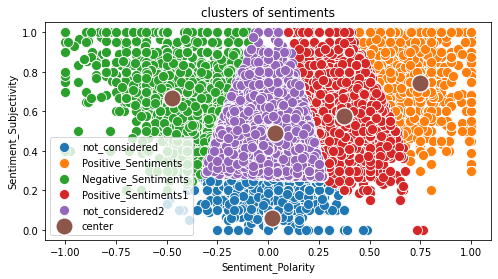

In [53]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=x[y_kmeans==0,0] ,y=x[y_kmeans==0,1] ,s=100,label="not_considered")
sns.scatterplot(x=x[y_kmeans==1,0] ,y=x[y_kmeans==1,1],s=100,label="Positive_Sentiments")
sns.scatterplot(x=x[y_kmeans==2,0] ,y=x[y_kmeans==2,1] ,s=100,label="Negative_Sentiments")
sns.scatterplot(x=x[y_kmeans==3,0] ,y=x[y_kmeans==3,1],s=100,label="Positive_Sentiments1")
sns.scatterplot(x=x[y_kmeans==4,0] ,y=x[y_kmeans==4,1],s=100,label="not_considered2")
sns.scatterplot(x=kmeans.cluster_centers_[:,0] ,y= kmeans.cluster_centers_[:,1] ,s=300,label="center")
plt.title("clusters of sentiments")
plt.xlabel("Sentiment_Polarity")
plt.ylabel("Sentiment_Subjectivity")

In [54]:
clusters=[]
for c in y_kmeans:
    if c==0:
        clusters.append("not_considered")
    elif c==1:
        clusters.append("Positive_Sentiments")
    elif c==2:
        clusters.append("Negative_Sentiments")
    elif c==3:
        clusters.append("Positive_Sentiments1")
    elif c==4:
        clusters.append("not_considered2") 
        
        
Main_data["clusters"]=clusters 

## TOP PRODUCTS

In [55]:
top= Main_data[Main_data['clusters']=='Positive_Sentiments']

In [58]:
top['App'].value_counts()[:10]

10 Best Foods for You                                 88
Box                                                   45
Hairstyles step by step                               41
Health and Nutrition Guide                            40
Candy Camera - selfie, beauty camera, photo editor    34
Bubble Shooter                                        34
Family Locator - GPS Tracker                          33
Google My Business                                    33
Accounting App - Zoho Books                           33
Fuelio: Gas log & costs                               31
Name: App, dtype: int64

In [57]:
top.head()

,App,Translated_Review,Class_reviews,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,neg,neu,pos,compound,clusters
0,10 Best Foods for You,like eat delicious food cooking food case best...,pos,Positive,1.0,0.533333,0.0,0.430,0.570,0.9531,Positive_Sentiments
3,10 Best Foods for You,best idea us,pos,Positive,1.0,0.300000,0.0,0.323,0.677,0.6369,Positive_Sentiments
4,10 Best Foods for You,best way,pos,Positive,1.0,0.300000,0.0,0.192,0.808,0.6369,Positive_Sentiments
5,10 Best Foods for You,amazing,pos,Positive,0.6,0.900000,0.0,0.000,1.000,0.5859,Positive_Sentiments
8,10 Best Foods for You,good,pos,Positive,0.7,0.600000,0.0,0.256,0.744,0.4404,Positive_Sentiments


## BOTTOM PRODUCTS

In [59]:
bot= Main_data[Main_data['clusters']=='Negative_Sentiments']

In [60]:
bot['App'].value_counts()[:10]

Angry Birds Classic                                   42
Bowmasters                                            38
Ltd - Mobile Gift Card Wallet                         36
Candy Crush Soda Saga                                 33
Agar.io                                               32
BestCam Selfie-selfie, beauty camera, photo editor    28
Colorfy: Coloring Book for Adults - Free              24
Candy Crush Saga                                      24
8 Ball Pool                                           24
Expedia Hotels, Flights & Car Rental Travel Deals     24
Name: App, dtype: int64

In [61]:
bot.head()

,App,Translated_Review,Class_reviews,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,neg,neu,pos,compound,clusters
29,10 Best Foods for You,recipe book unable recipe book,neg,Negative,-0.500,0.500,0.306,0.694,0.0,-0.2960,Negative_Sentiments
82,10 Best Foods for You,crap work,neg,Negative,-0.800,0.800,0.565,0.435,0.0,-0.3818,Negative_Sentiments
92,10 Best Foods for You,boring thought actually texts poor old texts,neg,Negative,-0.325,0.475,0.375,0.625,0.0,-0.6597,Negative_Sentiments
126,10 Best Foods for You,recipe book unable recipe book,neg,Negative,-0.500,0.500,0.306,0.694,0.0,-0.2960,Negative_Sentiments
179,10 Best Foods for You,crap work,neg,Negative,-0.800,0.800,0.565,0.435,0.0,-0.3818,Negative_Sentiments


## PRODUCT RECOMMENDATIONS

In [62]:
Main_data.columns

Index(['App', 'Translated_Review', 'Class_reviews', 'Sentiment',
       'Sentiment_Polarity', 'Sentiment_Subjectivity', 'neg', 'neu', 'pos',
       'compound', 'clusters'],
      dtype='object')

In [63]:
new_df=Main_data.groupby("App").filter(lambda x:x['Class_reviews'].count() >=1)
new_df

,App,Translated_Review,Class_reviews,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,neg,neu,pos,compound,clusters
0,10 Best Foods for You,like eat delicious food cooking food case best...,pos,Positive,1.000000,0.533333,0.000,0.430,0.570,0.9531,Positive_Sentiments
1,10 Best Foods for You,help eating healthy exercise regular basis,pos,Positive,0.250000,0.288462,0.000,0.481,0.519,0.6597,not_considered2
2,10 Best Foods for You,works great especially going grocery store,pos,Positive,0.400000,0.875000,0.000,0.549,0.451,0.6249,Positive_Sentiments1
3,10 Best Foods for You,best idea us,pos,Positive,1.000000,0.300000,0.000,0.323,0.677,0.6369,Positive_Sentiments
4,10 Best Foods for You,best way,pos,Positive,1.000000,0.300000,0.000,0.192,0.808,0.6369,Positive_Sentiments
...,...,...,...,...,...,...,...,...,...,...,...
37422,Housing-Real Estate & Property,ads older many agents much owner posted detail...,neg,Positive,0.173333,0.486667,0.238,0.762,0.000,-0.6486,not_considered2
37423,Housing-Real Estate & Property,photos posted portal load fit purpose sure sto...,pos,Positive,0.225000,0.447222,0.044,0.717,0.240,0.7430,not_considered2
37424,Housing-Real Estate & Property,dumb app wanted post property rent give option...,neg,Negative,-0.287500,0.250000,0.337,0.663,0.000,-0.7269,not_considered
37425,Housing-Real Estate & Property,property business got link sms happy performan...,pos,Positive,0.800000,1.000000,0.000,0.638,0.362,0.7783,Positive_Sentiments


In [67]:
ratings_matrix = new_df.pivot_table(index='App', columns='Class_reviews', fill_value=0)
ratings_matrix.head()

Sentiment_Polarity  \
Class_reviews                                                     neg   
App                                                                     
10 Best Foods for You                                       -0.151786   
104 Find a job - Find a job, find a part-time j...           0.000000   
11st                                                        -0.123611   
1800 Contacts - Lens Store                                  -0.150000   
1LINE – One Line with One Touch                             -0.109762   

                                                                        \
Class_reviews                                        neutral       pos   
App                                                                      
10 Best Foods for You                               0.129167  0.557198   
104 Find a job - Find a job, find a part-time j...  0.003333  0.447986   
11st                                                0.079545  0.408914   
1800 Contacts - Lens Store                          0.000000  0.372165   
1LINE – One Line with One Touch                    -0.100000  0.318809   

                                                   Sentiment_Subjectivity  \
Class_reviews                                                         neg   
App                                                                         
10 Best Foods for You                                            0.403571   
104 Find a job - Find a job, find a part-time j...               0.000000   
11st                                                             0.380324   
1800 Contacts - Lens Store                                       0.250000   
1LINE – One Line with One Touch                                  0.619952   

                                                                        \
Class_reviews                                        neutral       pos   
App                                                                      
10 Best Foods for You                               0.162500  0.535782   
104 Find a job - Find a job, find a part-time j...  0.055000  0.615590   
11st                                                0.353084  0.536140   
1800 Contacts - Lens Store                          0.119048  0.651051   
1LINE – One Line with One Touch                     0.166667  0.632527   

                                                    compound          \
Class_reviews                                            neg neutral   
App                                                                    
10 Best Foods for You                              -0.435671     0.0   
104 Find a job - Find a job, find a part-time j...  0.000000     0.0   
11st                                               -0.368975     0.0   
1800 Contacts - Lens Store                         -0.274750     0.0   
1LINE – One Line with One Touch                    -0.371720     0.0   

                                                                   neg  \
Class_reviews                                            pos       neg   
App                                                                      
10 Best Foods for You                               0.638915  0.407857   
104 Find a job - Find a job, find a part-time j...  0.545226  0.000000   
11st                                                0.494765  0.264833   
1800 Contacts - Lens Store                          0.615889  0.227000   
1LINE – One Line with One Touch                     0.545059  0.423200   

                                                                      \
Class_reviews                                      neutral       pos   
App                                                                    
10 Best Foods for You                                  0.0  0.014768   
104 Find a job - Find a job, find a part-time j...     0.0  0.003543   
11st                                                   0.0  0.012050   
1800 Contacts - Lens Store                             0.0  0

In [68]:
print('Shape of the pivot table: ', ratings_matrix.shape)

Shape of the pivot table:  (868, 18)


In [69]:
X = ratings_matrix

In [70]:
X.index

Index(['10 Best Foods for You',
       '104 Find a job - Find a job, find a part-time job, find a part-time job, resume health check, resume clinic',
       '11st', '1800 Contacts - Lens Store', '1LINE – One Line with One Touch',
       '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif',
       '21-Day Meditation Experience', '2Date Dating App, Love and matching',
       '2GIS: directory & navigator', '2RedBeans',
       ...
       'NEW NEWS - Read Newspapers and News 24h', 'People's Bank',
       'Rain radar - weather',
       'Read- Latest News, Information, Gossip and Politics',
       'The TK app – everything under control', 'The wall',
       'The weather of AEMET', 'bloglovin'', 'clear',
       'dr Oetker recipe ideas'],
      dtype='object', name='App', length=868)

In [71]:
%%time
from sklearn.decomposition import TruncatedSVD       # used for dimensionality reduction
SVD = TruncatedSVD(n_components=2)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

CPU times: user 8.05 ms, sys: 15.4 ms, total: 23.5 ms
Wall time: 26.2 ms


(868, 2)

In [72]:
%%time
correlation_matrix = np.corrcoef(decomposed_matrix)        # Return Pearson product-moment correlation coefficients.
correlation_matrix.shape

CPU times: user 9.29 ms, sys: 4.02 ms, total: 13.3 ms
Wall time: 16.8 ms


(868, 868)

In [73]:
def recommend(s):
    l = list(X.index)
    h = l.index(s)
    i=X.index[h]
    correlation_product_ID = correlation_matrix[h]
    Recommend = list(X.index[correlation_product_ID > 0.5])
    Recommend.remove(i)
    print(Recommend[0:5])
     

In [74]:
s = '2GIS: directory & navigator'

In [75]:
recommend(s)

['10 Best Foods for You', '104 Find a job - Find a job, find a part-time job, find a part-time job, resume health check, resume clinic', '11st', '1800 Contacts - Lens Store', '1LINE – One Line with One Touch']


### Conclusion
- SENTIMENTAL ANALYSIS 


Model is able to Automate Sentiment Predictions 
Some App names were in different language are converted into English
Positive Sentiments are Higher than Negative and Neutral Sentiments 
- Clustering 

By Clustering Top and Bottom Products are found on the basis of Sentiment_Polarity and Sentiment_Subjectivity

- PRODUCT RECOMMENDATION 

Model is able to recommend related products based on Sentiments